In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ConsPensionContribModel import (
    PensionContribConsumerType,
    PensionRetirementConsumerType,
)
from HARK.utilities import plot_funcs
from IPython import get_ipython

plt.style.use("seaborn-whitegrid")


In [2]:
agent = PensionRetirementConsumerType()
agent.solve()


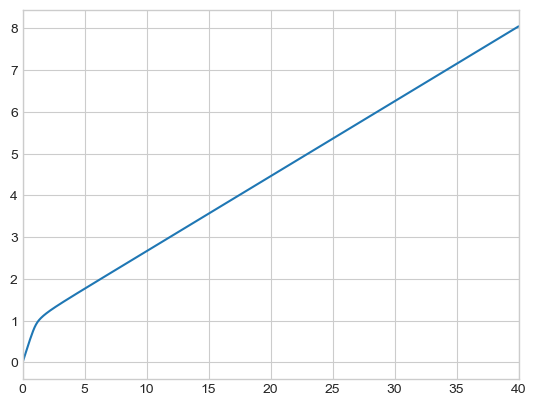

In [3]:
plot_funcs(agent.solution[10].cFunc, 0, 40)

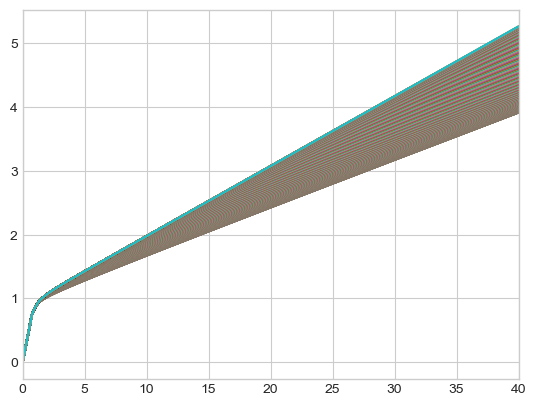

In [4]:
plot_funcs(agent.solution[0].consumption_stage.c_func.xInterpolators, 0, 40)


In [5]:
def plot_3d_func(func, min, max, n=100):
    get_ipython().run_line_magic("matplotlib", "widget")
    xgrid = np.linspace(min, max, n)
    ygrid = xgrid

    xmat, ymat = np.meshgrid(xgrid, ygrid, indexing="ij")

    zmat = func(xmat, ymat)

    ax = plt.axes(projection="3d")
    ax.plot_surface(xmat, ymat, zmat, cmap="viridis")
    ax.set_title("surface")
    ax.set_xlabel("m")
    ax.set_ylabel("n")
    ax.set_zlabel("f")
    plt.show()


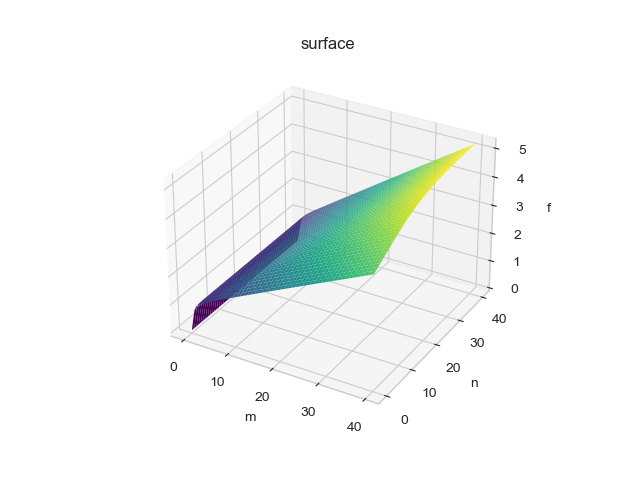

In [10]:
plot_3d_func(agent.solution[0].deposit_stage.c_func, 0, 40)


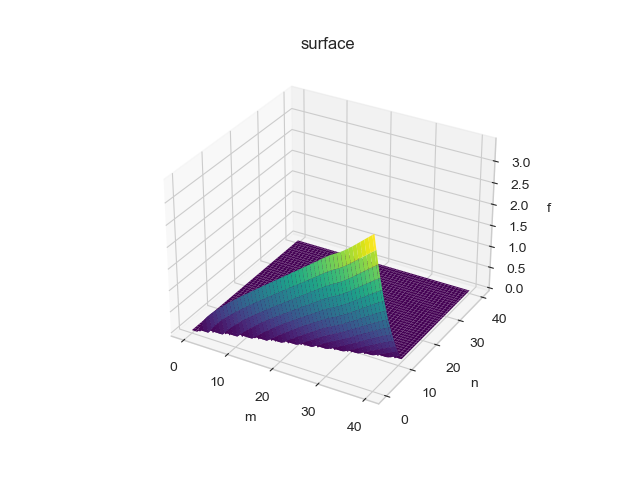

In [11]:
plot_3d_func(agent.solution[0].deposit_stage.d_func, 0, 40)


In [8]:
def scatter_hist(x, y, color, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    hist = ax.scatter(x, y, c=color, cmap="viridis", alpha=0.6)

    # now determine nice limits by hand:
    binwidth = 1.5
    xymax = max(np.max(x), np.max(y))
    xymin = min(np.min(x), np.min(y))
    top = (int(xymax / binwidth) + 1) * binwidth
    bottom = (int(xymin / binwidth) + 1) * binwidth

    bins = np.arange(bottom, top + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation="horizontal")

    return hist


C:\Users\alujan\AppData\Local\Temp\ipykernel_37144\3074662940.py:29: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(hist)


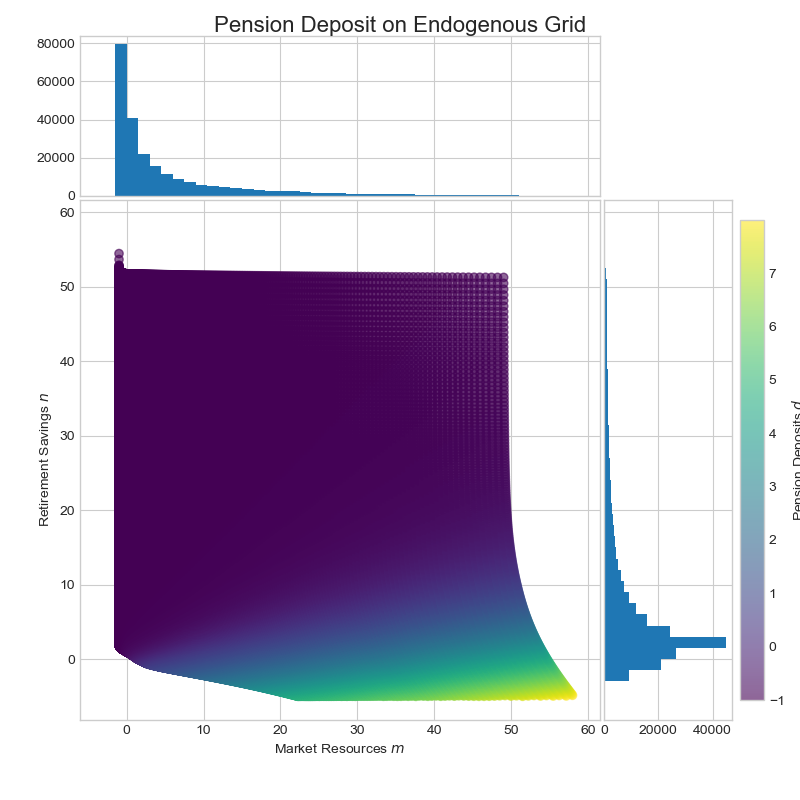

In [12]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = agent.solution[0].deposit_stage.linear_interp.points[:, 0]
y = agent.solution[0].deposit_stage.linear_interp.points[:, 1]
color = agent.solution[0].deposit_stage.linear_interp.values

# idx = np.logical_or(x < 0, y < 0)

# x = x[~idx]
# y = y[~idx]
# color = color[~idx]

# use the previously defined function
hist = scatter_hist(x, y, color, ax, ax_histx, ax_histy)
cbar = fig.colorbar(hist)
cbar.ax.set_ylabel("Pension Deposits $d$")

fig.suptitle("Pension Deposit on Endogenous Grid", fontsize=16)
ax.set_xlabel("Market Resources $m$")
ax.set_ylabel("Retirement Savings $n$")
plt.show()
fig.savefig("EndogenousGrid.pdf")
